In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression

# conda install mlxtend --channel conda-forge
from mlxtend.plotting import plot_decision_regions

from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import datasets
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('Datasets/Wine.csv')
# df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
Class                           178 non-null int64
Alcohol                         178 non-null float64
Malic acid                      178 non-null float64
Ash                             178 non-null float64
Alcalinity of ash               178 non-null float64
Magnesium                       178 non-null int64
Total phenols                   178 non-null float64
Flavanoids                      178 non-null float64
Nonflavanoid phenols            178 non-null float64
Proanthocyanins                 178 non-null float64
Color intensity                 178 non-null float64
Hue                             178 non-null float64
OD280/OD315 of diluted wines    178 non-null float64
Proline                         178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


In [2]:
X = df[['Alcohol' , 'Flavanoids']]
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(
          X, y, test_size=0.25, random_state=0)
len(X_train)/len(df) # check train test split options


0.7471910112359551

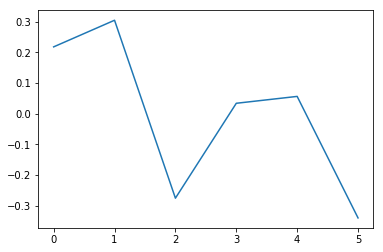

In [3]:
lr_L2 = LogisticRegression(C=0.01,multi_class = 'multinomial', solver = 'lbfgs') # penalty='l2' by default
lr_L2.fit(X_train, y_train)
plt.plot(lr_L2.coef_.flatten())

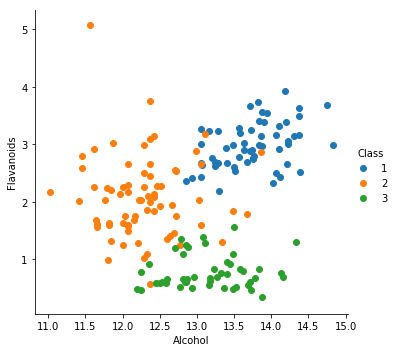

In [4]:
sns.FacetGrid(df, hue="Class", size=5) \
   .map(plt.scatter, "Alcohol", "Flavanoids") \
   .add_legend()

In [5]:
# log_mod = LogisticRegression()
# log_mod.fit(X_train, y_train)
preds = lr_L2.predict(X_test)
confusion_matrix(y_test, preds) 

array([[15,  1,  0],
       [ 2, 19,  0],
       [ 0,  2,  6]], dtype=int64)

In [6]:
preds = preds.reshape(len(preds),1)


In [7]:
precision_score(y_test, preds , average='micro')  # will return the total ratio of tp/(tp + fp)

0.8888888888888888

In [8]:
recall_score(y_test, preds , average='micro')

0.8888888888888888

In [9]:
accuracy_score(y_test, preds )

0.8888888888888888

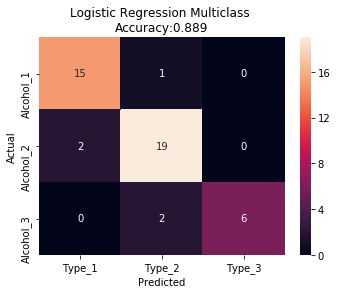

In [10]:
# Creates a confusion matrix
cm = confusion_matrix(y_test, preds) 

# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = ['Alcohol_1','Alcohol_2','Alcohol_3'], 
                     columns = ['Type_1','Type_2','Type_3'])

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Logistic Regression Multiclass \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, preds)))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

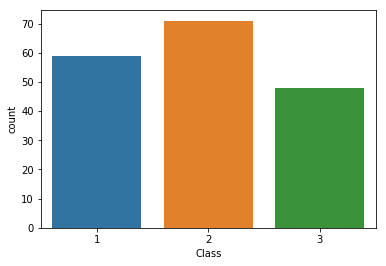

In [11]:
sns.countplot(df['Class'],label="Count")
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


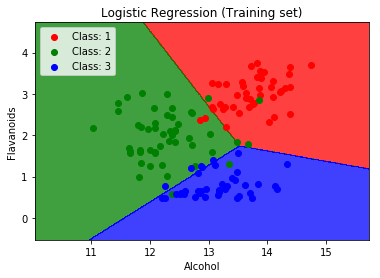

In [12]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train.values, y_train.values
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, lr_L2.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green' , 'blue'))(i), label = "Class: " + str(j))
plt.title('Logistic Regression (Training set)')
plt.xlabel('Alcohol')
plt.ylabel('Flavanoids')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


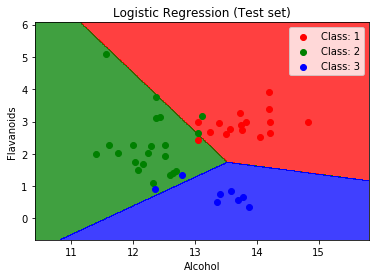

In [13]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test.values, y_test.values
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, lr_L2.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green' , 'blue'))(i), label = "Class: " + str(j))
plt.title('Logistic Regression (Test set)')
plt.xlabel('Alcohol')
plt.ylabel('Flavanoids')
plt.legend()
plt.show()